In [0]:
!pip install -q matplotlib
!pip install -q pandas
!pip install -q numpy
!pip install -q seaborn
!pip install -q sklearn
!pip install -q scipy
!pip install -q keras


In [0]:
import numpy as np
import pandas as pd
import warnings
from matplotlib import*
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from numpy.linalg import inv
from sklearn.model_selection import GridSearchCV
import keras
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
import pickle
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145605 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redir

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
features = list()
with open('drive/ALDA/dataset/' +'features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [0]:
X_train = pd.read_csv('drive/ALDA/dataset/train/X_train.txt', delim_whitespace=True, header=None)
Y_train = pd.read_csv('drive/ALDA/dataset/train/y_train.txt', delim_whitespace=True, header=None)
pca = PCA(n_components=561)
Components = pca.fit_transform(X_train)


pca_new = PCA(n_components=100)
X_train_new = pca_new.fit_transform(X_train)

print(X_train_new.shape)
X_test = pd.read_csv('drive/ALDA/dataset/test/X_test.txt', delim_whitespace=True, header=None)
Y_test = pd.read_csv('drive/ALDA/dataset/test/y_test.txt', delim_whitespace=True, header=None)


X_test_new = pca_new.transform(X_test)


(7352, 100)


In [0]:
C = [0.1,0.2,0.3,1,5,10,20,100,200,1000]
degree = [1,2,3,4,5]
coef0 = [0.0001, 0.001, 0.002, 0.01, 0.02, 0.1, 0.2, 0.3, 1, 2, 5, 10]
gamma = [0.0001,0.001, 0.002, 0.01, 0.02, 0.03, 0.1, 0.2, 1, 2, 3]


Values of parameter for which results are optimal are:
{'C': 1, 'kernel': 'linear'}
0.9436887921653971
0.9640312181879878


In [0]:
teuned_parameters = [{'kernel':['linear'],'C': C }]
scores ='accuracy'
clf =  GridSearchCV(SVC(),teuned_parameters, scoring = scores)
clf.fit(X_train_new,Y_train)
print("Values of parameter for which results are optimal are:")

print(clf.best_params_ )
print(clf.best_score_)
print(accuracy_score(Y_test,clf.predict(X_test_new)))

In [0]:
teuned_parameters = [{'kernel':['rbf'],'C': C, 'gamma':gamma}]
scores ='accuracy'
clf =  GridSearchCV(SVC(),teuned_parameters, scoring = scores)
clf.fit(X_train_new,Y_train)
print("Values of parameter for which results are optimal are:")

print(clf.best_params_ )
print(clf.best_score_)
print(accuracy_score(Y_test,clf.predict(X_test_new)))

In [0]:

filename = 'drive/ALDA/dataset/svm_radial_kernek.sav'
pickle.dump(clf, open(filename, 'wb'))

In [0]:
filename = 'drive/ALDA/dataset/svm_radial_kernek.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## 1D-CNN


In [0]:
import keras
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from sklearn import preprocessing
import os
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
import time

In [0]:
# TensorBoard logs
tb = TensorBoard(log_dir=os.path.join('drive/ALDA/', 'logs', "CNN"))

# Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('drive/ALDA/', 'logs', "CNN" + '-' + 'training-' + \
    str(timestamp) + '.log'))

#RNN_LSTM

In [0]:
def load_file(filepath):
	dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = np.dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix )
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix)
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

trainX, trainy, testX, testy = load_dataset("drive/ALDA/dataset/")

valX =  trainX[int(0.8*len(trainX)):]
print(valX.shape)
valy = trainy[int(0.8*len(trainy)):]

trainX , trainy = trainX[:int(0.8*len(trainX))] , trainy[:int(0.8*len(trainy))]
print(trainX.shape, trainy.shape)
 

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
(1471, 128, 9)
(5881, 128, 9) (5881, 6)


In [0]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3,activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model.add(Conv1D(filters=24, kernel_size=3,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
# model.fit(trainX, trainy, epochs=10, batch_size=8, validation_data=(valX, valy),callbacks=[tb, csv_logger])
# 	# evaluate model
# _, accuracy = model.evaluate(testX, testy, batch_size=8)
# print(accuracy)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 124, 24)           2328      
_________________________________________________________________
dropout_5 (Dropout)          (None, 124, 24)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 41, 24)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 984)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                63040     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                

In [0]:
filename = 'CNN_model_new.sav'
pickle.dump(model, open(filename, 'wb'))

## LSTM



In [0]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from sklearn import preprocessing
import os
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
import time

In [0]:
# TensorBoard logs
tb = TensorBoard(log_dir=os.path.join('drive/ALDA/', 'logs', "CNN"))

early_stopper  = EarlyStopping(patience=5)
# Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('drive/ALDA/', 'logs', "RNN" + '-' + 'training-' + \
    str(timestamp) + '.log'))

#RNN_LSTM

In [0]:
timesteps = trainX.shape[1]
input_dim = trainX.shape[2]
n_classes  = 6
print(timesteps)
print(input_dim)

128
9


In [0]:
model = Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(LSTM(28,input_shape=(timesteps, input_dim)))
model.add(Dropout(0.6))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_3 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
# valX =  trainX[int(0.8*len(trainX)):]
# print(valX.shape)
# valy = trainy[int(0.8*len(trainy)):]

# trainX , trainy = trainX[:int(0.8*len(trainX))] , trainy[:int(0.8*len(trainy))]
# print(trainX.shape, trainy.shape)


(941, 128, 9)
(3763, 128, 9) (3763, 6)


In [0]:
model.fit(trainX,
          trainy,
          batch_size=16,
          validation_data=(valX, valy),
          callbacks=[tb, early_stopper, csv_logger],
          epochs=30)

Train on 5881 samples, validate on 1471 samples
Epoch 1/30
5881/5881 [==============================] - 60s 10ms/step - loss: 1.2937 - acc: 0.4739 - val_loss: 1.0413 - val_acc: 0.5452

Epoch 2/30
5881/5881 [==============================] - 57s 10ms/step - loss: 0.9313 - acc: 0.6123 - val_loss: 0.8825 - val_acc: 0.6669
Epoch 3/30
5881/5881 [==============================] - 59s 10ms/step - loss: 0.8008 - acc: 0.6467 - val_loss: 0.7981 - val_acc: 0.6424
Epoch 4/30
5881/5881 [==============================] - 58s 10ms/step - loss: 0.7566 - acc: 0.6609 - val_loss: 0.7652 - val_acc: 0.6818
Epoch 5/30
5881/5881 [==============================] - 58s 10ms/step - loss: 0.6619 - acc: 0.7097 - val_loss: 0.7741 - val_acc: 0.7831
Epoch 6/30
5881/5881 [==============================] - 59s 10ms/step - loss: 0.6438 - acc: 0.7279 - val_loss: 0.6179 - val_acc: 0.7369
Epoch 7/30
5881/5881 [==============================] - 58s 10ms/step - loss: 0.5941 - acc: 0.7541 - val_loss: 0.6183 - val_acc: 0.7328

In [0]:
filename = 'RNN_LSTM_model_new.sav'
pickle.dump(model, open(filename, 'wb'))

In [0]:
_, accuracy = model.evaluate(testX, testy, batch_size=16)
print(accuracy)

2947/2947 [==============================] - 4s 1ms/step
0.9070240922972514


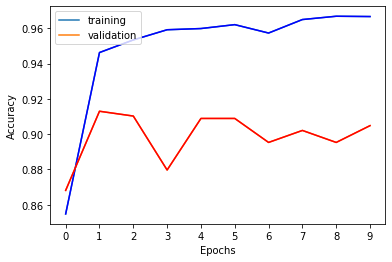

In [0]:
"""plot the results of training"""
import csv
import matplotlib.pyplot as plt

def plot_graphs(logfile):
    with open(logfile) as fin:
        reader = csv.reader(fin)
        next(reader, None)  # skip the header
        accuracy_train = []
        accuracy_validation = []
        loss_train = []
        loss_validation = []
        epochs = []
        cnn_benchmark = []  

        for epoch,acc,loss,val_acc,val_loss in reader:
              accuracy_train.append(float(acc))
              accuracy_validation.append(float(val_acc))
              epochs.append(epoch)
              cnn_benchmark.append(0.65) 

        fig = plt.figure()
        ax1 = fig.add_subplot(111)

        ax1.plot(epochs, accuracy_train, label="training")
        ax1.plot(epochs, accuracy_train, "b")
        ax1.plot(epochs, accuracy_validation, label="validation")
        ax1.plot(epochs, accuracy_validation, "r")
        ax1.legend(loc=2)
        plt.xticks(epochs)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")

        plt.show()

plot_graphs("drive/ALDA/logs/CNN-training-1574736022.041377.log")


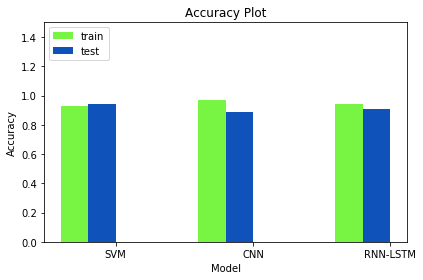

In [0]:
def plot_results(result3, result2, result1):

    data = np.array([result3, result2, result1])    

    length = len(data)
    x_labels = ['SVM', 'CNN', 'RNN-LSTM']

    fig, ax = plt.subplots()
    # fig.set_size_inches(18.5, 10.5)
    width = 0.2
    x = np.arange(length)

    ax.bar(x, data[:,0], width, color='#78f542', label='CNN-MLP')
    ax.bar(x + width, data[:,1], width, color='#0F52BA', label='CNN-LSTM')

    ax.set_ylabel('Accuracy')
    ax.set_ylim(0,1.5)
    ax.set_xticks(x + width + width/2)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('Model')
    ax.set_title('Accuracy Plot')
    plt.legend(['train', 'test'], loc='upper left')

    fig.tight_layout()
    plt.show()

svm = [0.93, 0.94]
cnn = [0.9667, 0.8853]
LSTM = [0.9396,0.9070]
plot_results(svm, cnn, LSTM)